In [14]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/238.4 kB ? eta -:--:--
   ---------------------------------------- 238.4/238.4 kB 4.9 MB/s eta 0:00:00


In [15]:
# -------------------------------------
# Step 1: Import Required Libraries
# -------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

In [18]:
# -------------------------------------
# Step 2: Load and Clean the Dataset
# -------------------------------------
# Load your dataset
df = pd.read_excel("C:/Users/JOW/Downloads/SALE_RAW.xlsx")

# Strip extra spaces from column names
df.columns = df.columns.str.strip()

In [19]:
# -------------------------------------
# Step 3: Encode Categorical Columns
# -------------------------------------
label_encoders = {}
categorical_columns = ['Gender', 'EDUCATION', 'TENURESHIP', 'JOB']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [27]:
# -------------------------------------
# Step 4: Remove job classes with fewer than 2 samples
# -------------------------------------
job_counts = df['JOB'].value_counts()
valid_jobs = job_counts[job_counts >= 2].index  # Keep only jobs with 2+ samples
df = df[df['JOB'].isin(valid_jobs)]

# Redefine X and y after filtering
X = df.drop(columns=['JOB'])
y = df['JOB']


In [28]:
# -------------------------------------
# Step 5: Apply SMOTE to Balance the Classes
# -------------------------------------
# Split first, then oversample only the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
from imblearn.over_sampling import SMOTE

# Use fewer neighbors to accommodate small classes
smote = SMOTE(random_state=42, k_neighbors=1)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [31]:
# -------------------------------------
# Step 6: Train the Random Forest Model
# -------------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_sm, y_train_sm)

RandomForestClassifier(random_state=42)

In [32]:
# -------------------------------------
# Step 7: Evaluate the Model
# -------------------------------------
y_pred = rf.predict(X_test)

# Match class labels in test set
unique_labels = sorted(y_test.unique())
class_names = label_encoders['JOB'].inverse_transform(unique_labels)

# Accuracy and Classification Report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, labels=unique_labels, target_names=class_names)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n")
print(report)

Accuracy: 0.26

Classification Report:

                                                    precision    recall  f1-score   support

             Engineering Management Staff/Engineer       0.00      0.00      0.00         2
                             Instructor/ Professor       0.67      1.00      0.80         2
Operations Engineering & Management Staff/Engineer       0.00      0.00      0.00         2
     Operations Research & Analysis Staff Engineer       0.00      0.00      0.00         1
                                           Planner       0.00      0.00      0.00         1
                  Procurement/ Purchasing Engineer       0.00      0.00      0.00         1
       Product Design & Development Staff/Engineer       0.25      1.00      0.40         1
                               Production Engineer       0.33      0.25      0.29         4
  Quality & Reliability Engineering Staff/Engineer       1.00      0.50      0.67         2
                  Safety Department Sta

C:\Users\JOW\miniforge3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\JOW\miniforge3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\JOW\miniforge3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


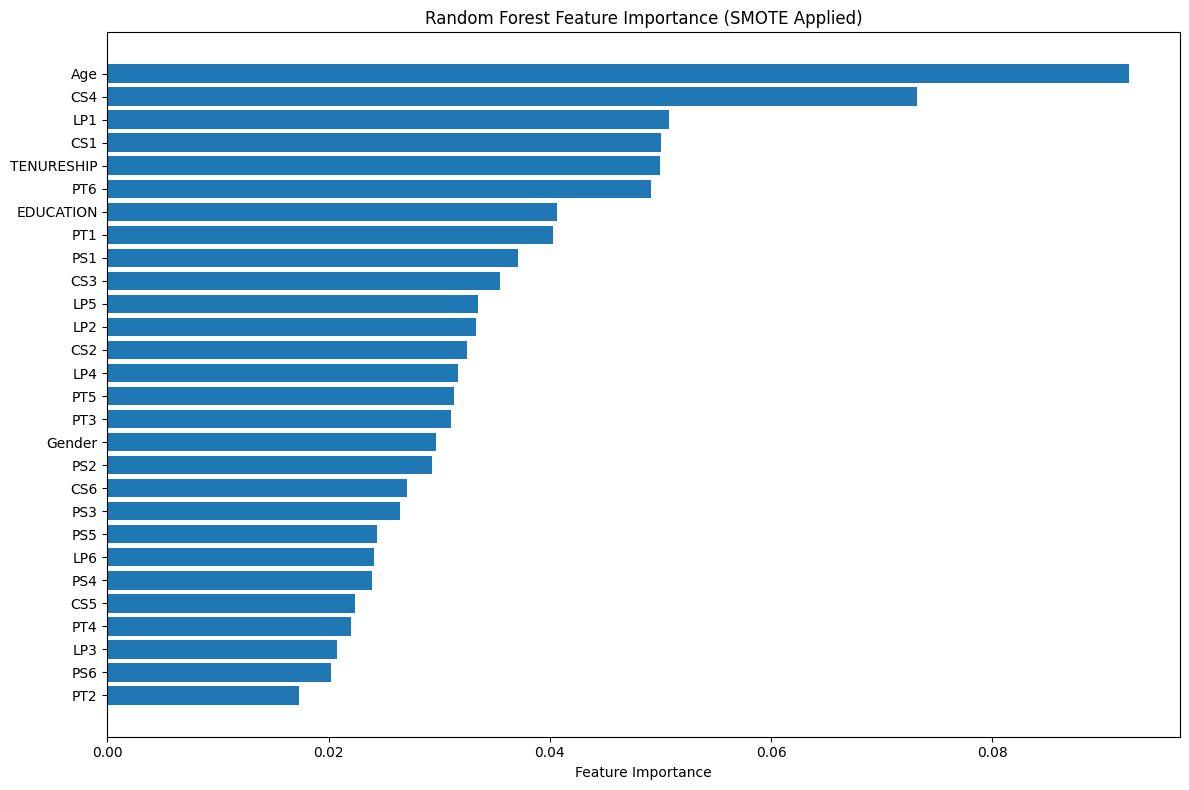

In [33]:
# -------------------------------------
# Step 8: Plot Feature Importances
# -------------------------------------
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance (SMOTE Applied)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [34]:
import joblib

# Save model and encoders
joblib.dump(rf, 'job_predictor_model.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

['label_encoders.pkl']

In [36]:
!pip install streamlit

     ---------------------------------------- 0.0/44.3 kB ? eta -:--:--
     ---------------------------------------- 44.3/44.3 kB 2.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.8 MB 22.0 MB/s eta 0:00:01
   ------- -------------------------------- 1.8/9.8 MB 19.3 MB/s eta 0:00:01
   ------------- -------------------------- 3.4/9.8 MB 24.0 MB/s eta 0:00:01
   -------------------- ------------------- 5.1/9.8 MB 27.3 MB/s eta 0:00:01
   --------------------------- ------------ 6.9/9.8 MB 29.3 MB/s eta 0:00:01
   ------------------------------- -------- 7.8/9.8 MB 29.4 MB/s eta 0:00:01
   ------------------------------------ --- 9.0/9.8 MB 27.5 MB/s eta 0:00:01
   ---------------------------------------  9.8/9.8 MB 27.3 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 25.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/731.2 kB ? eta -:--:--
   ------------

In [42]:
# streamlit_app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load model and encoders
model = joblib.load('job_predictor_model.pkl')
label_encoders = joblib.load('label_encoders.pkl')

pt_cols = [f'PT{i}' for i in range(1, 7)]
lp_cols = [f'LP{i}' for i in range(1, 7)]
cs_cols = [f'CS{i}' for i in range(1, 7)]
ps_cols = [f'PS{i}' for i in range(1, 7)]

st.title("Job Role Predictor")

age = st.slider("Age", 18, 60, 25)
gender = st.selectbox("Gender", label_encoders['Gender'].classes_)
education = st.selectbox("Education", label_encoders['EDUCATION'].classes_)
tenure = st.selectbox("Tenureship", label_encoders['TENURESHIP'].classes_)

def collect_section(title, columns):
    st.subheader(title)
    return [st.slider(q, 1, 5, 3) for q in columns]

pt_answers = collect_section("Personality Traits (PT)", pt_cols)
lp_answers = collect_section("Learning Preferences (LP)", lp_cols)
cs_answers = collect_section("Cognitive Strengths (CS)", cs_cols)
ps_answers = collect_section("Professional Strengths (PS)", ps_cols)

input_data = pd.DataFrame([[
    age,
    label_encoders['Gender'].transform([gender])[0],
    label_encoders['EDUCATION'].transform([education])[0],
    label_encoders['TENURESHIP'].transform([tenure])[0],
    *pt_answers, *lp_answers, *cs_answers, *ps_answers
]], columns=[
    'Age', 'Gender', 'EDUCATION', 'TENURESHIP',
    *pt_cols, *lp_cols, *cs_cols, *ps_cols
])

if st.button("Predict Job"):
    prediction = model.predict(input_data)[0]
    predicted_job = label_encoders['JOB'].inverse_transform([prediction])[0]
    st.success(f"🎯 Predicted Job: **{predicted_job}**")

2025-04-07 12:40:08.854 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 12:40:08.856 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 12:40:08.856 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 12:40:08.858 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 12:40:08.859 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 12:40:08.860 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 12:40:08.860 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 12:40:08.861 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [43]:
cd

C:\Users\JOW


C:\Users\JOW\miniforge3\lib\site-packages\IPython\core\magics\osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
C:\Users\JOW\miniforge3\lib\site-packages\IPython\core\magics\osm.py:428: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [44]:
cd C:\Users\JOW\Documents\streamlit_projects

[WinError 2] The system cannot find the file specified: 'C:\\Users\\JOW\\Documents\\streamlit_projects'
C:\Users\JOW


In [45]:
python -m streamlit run streamlit_app.py

SyntaxError: invalid syntax (742797202.py, line 1)